https://www.alphavantage.co/documentation/

詢問 chat gpt 之問題 :
https://www.alphavantage.co/documentation/
給我一段demo code 抓取 VOO ETF 過去十年的歷史資料

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# 替換為你的 API 金鑰
API_KEY = 'your_api_key_here'
SYMBOL = 'VOO'
FUNCTION = 'TIME_SERIES_DAILY'
# outputsize=full 才能拿到超過100天以上的資料。
OUTPUT_SIZE = 'full'  # 拿全部資料

# Alpha Vantage API URL
url = f'https://www.alphavantage.co/query?function={FUNCTION}&symbol={SYMBOL}&outputsize={OUTPUT_SIZE}&apikey={API_KEY}'

# 發送請求
response = requests.get(url)
data = response.json()
print(data)
# 檢查是否成功取得資料
if "Time Series (Daily)" not in data:
    raise Exception(f"資料讀取失敗：{data}")

# 轉換為 DataFrame
df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient='index')
df.index = pd.to_datetime(df.index)
df = df.sort_index()  # 按日期排序
df.columns = [col[3:] for col in df.columns]  # 移除前綴 like "1. open" -> "open"
df = df.astype(float)

# 篩選過去10年的資料
end_date = datetime.now()
start_date = end_date - timedelta(days=365*10)
df = df.loc[start_date:end_date]

# 顯示前幾列
print(df.head())

# 儲存成 CSV（可選）
df.to_csv("VOO_10y_history.csv")

Alpha Vantage API 金鑰，免費使用者的限制是 每天最多 25 次請求

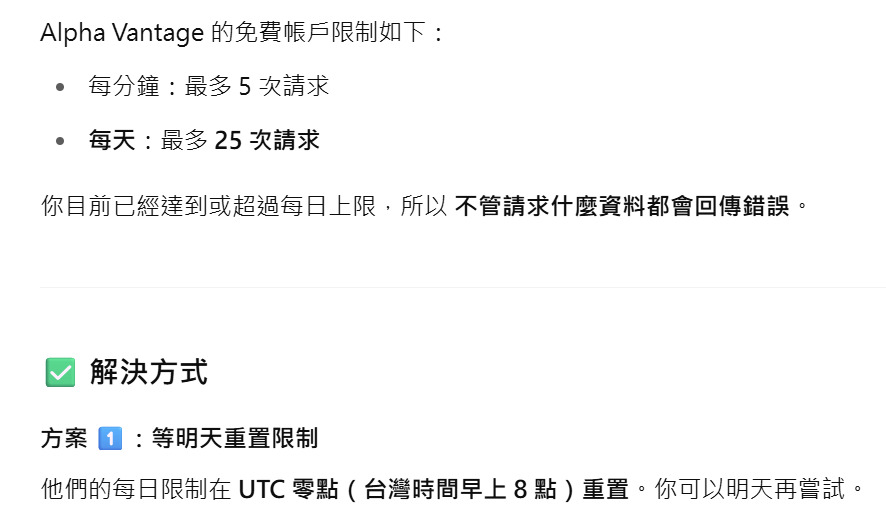

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# 迴圈版本

# 替換為你的 API 金鑰
API_KEY = 'your_api_key_here'
SYMBOL = ['SPY','VOO','IVV','VTI','QQQ','VT']
FUNCTION = 'TIME_SERIES_DAILY'

# outputsize=full 才能拿到超過100天以上的資料。
OUTPUT_SIZE = 'full'  # 拿全部資料

for SYMBOL in SYMBOL:
    # Alpha Vantage API URL
    url = f'https://www.alphavantage.co/query?function={FUNCTION}&symbol={SYMBOL}&outputsize={OUTPUT_SIZE}&apikey={API_KEY}'

    # 發送請求
    response = requests.get(url)
    data = response.json()
    # 檢查是否成功取得資料
    if "Time Series (Daily)" not in data:
        raise Exception(f"資料讀取失敗：{data}")

    # 轉換為 DataFrame
    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient='index')
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()  # 按日期排序
    df.columns = [col[3:] for col in df.columns]  # 移除前綴 like "1. open" -> "open"
    df = df.astype(float)
    print(df)
    # 篩選過去10年的資料
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365*10)
    df = df.loc[start_date:end_date]

    # 顯示前幾列
    print(df.head())
    # 儲存成 CSV（可選）
    csv_name = f"{SYMBOL}.csv"
    print(csv_name)
    df.to_csv(csv_name, encoding="utf-8")

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time

# 迴圈版本
# 替換為你的 API 金鑰
API_KEY = 'your_api_key_here'
# SYMBOL_ETF = ['SPY','VOO','IVV','VTI','QQQ','VT']
SYMBOL_ETF = ['SPY']
FUNCTION = 'TIME_SERIES_DAILY'

# outputsize=full 才能拿到超過100天以上的資料。
OUTPUT_SIZE = 'full'  # 拿全部資料

for SYMBOL in SYMBOL_ETF:
    print(f"正在下載：{SYMBOL}")
    # Alpha Vantage API URL
    url = f'https://www.alphavantage.co/query?function={FUNCTION}&symbol={SYMBOL}&outputsize={OUTPUT_SIZE}&apikey={API_KEY}'

    # 發送請求
    response = requests.get(url)
    data = response.json()
    # 檢查是否成功取得資料
    if "Time Series (Daily)" not in data:
        raise Exception(f"資料讀取失敗：{data}")

    # 轉換為 DataFrame
    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient='index')
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()  # 按日期排序
    # df.columns = [col[3:] for col in df.columns]  # 移除前綴 like "1. open" -> "open"
    df.columns = [col.split('. ')[1] for col in df.columns]
    df = df.astype(float)
    print(df)
    # 篩選過去10年的資料
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365*10)
    df = df.loc[start_date:end_date]

    # 顯示前幾列
    print(df.head())
    # 儲存成 CSV（可選）
    csv_name = f"{SYMBOL}.csv"
    print(csv_name)
    df.to_csv(csv_name, encoding="utf-8")
    print(f"✅ 已儲存：{csv_name}")
    time.sleep(15)  # 每次請求後等待 15 秒，安全範圍內